In [1]:
from langgraph.graph import StateGraph, START,END
from typing import TypedDict

In [2]:
class BatmanState(TypedDict):
    run : int
    balls: int
    fours:int
    sixes: int

    sr :float # Strike Rate
    bpb:float # boundary per ball
    boundary_percentage:float
    summary:str

In [3]:
def calculate_str(state:BatmanState):
    "calculating strike rate"
    balls = state['balls']
    runs = state['run']
    sr = (runs/balls) * 100
    state['sr'] = sr

    return {"sr":sr}

In [4]:
def calculate_bpb(state:BatmanState):
    "calculating Boundary per ball"
    balls = state['balls']
    fours = state['fours']
    sixes = state['sixes']

    bpb = balls / (fours + sixes)

    state['bpb'] = bpb

    return {"bpb":bpb}



In [5]:
def calculate_boundary_percentage(state:BatmanState):
    "Calculate Boundary percentage"
    runs = state['run']
    fours = state['fours']
    sixes = state['sixes']

    boudary_percentage = (((fours * 4) + (sixes * 6))/runs) * 100

    state['boundary_percentage'] = boudary_percentage

    return {"boundary_percentage":boudary_percentage}
    

In [6]:
def summary(state:BatmanState):
    "Creating summary"
    summary = f"""
    Strike Rate - {state['sr']} \n
    BPB - {state['bpb']} \n
    Boundary Percentage - {state['boundary_percentage']}
"""
    state['summary'] = summary

    return {"summary":summary}
    

In [7]:
# create graph

graph = StateGraph(BatmanState)
 # add nodes
graph.add_node("calculate_str",calculate_str)
graph.add_node("calculate_bpb",calculate_bpb)
graph.add_node("calculate_boundary_percentage",calculate_boundary_percentage)
graph.add_node("summary",summary)

# add edges

graph.add_edge(START,"calculate_str")
graph.add_edge(START,"calculate_bpb")
graph.add_edge(START,"calculate_boundary_percentage")
## Parrel workflow
graph.add_edge("calculate_str","summary")
graph.add_edge("calculate_bpb","summary")
graph.add_edge("calculate_boundary_percentage","summary")

graph.add_edge("summary",END)




In [8]:
# compiling workflow

workflow = graph.compile()

initial_state = {"run":100,"balls":50,"fours":10,"sixes":10}

final_result = workflow.invoke(initial_state)

print(final_result)

{'run': 100, 'balls': 50, 'fours': 10, 'sixes': 10, 'sr': 200.0, 'bpb': 2.5, 'boundary_percentage': 100.0, 'summary': '\n    Strike Rate - 200.0 \n\n    BPB - 2.5 \n\n    Boundary Percentage - 100.0\n'}


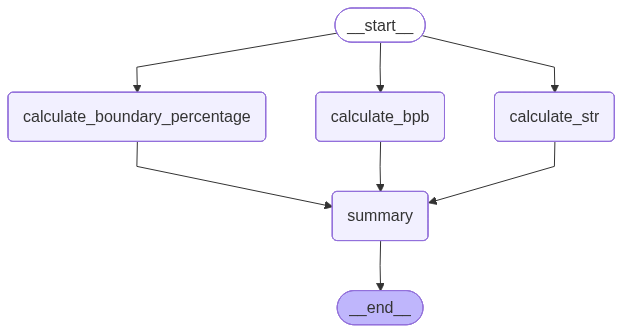

In [9]:
from IPython.display import Image

Image(workflow.get_graph().draw_mermaid_png())